In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import nbimporter

In [32]:
import pandas_to_latex

### Get Performance Measures

In [33]:
def get_performance_measures(y_true, y_pred):
    label_list = unique_labels(y_true)
    acc        = accuracy_score(y_true, y_pred)
    precision  = precision_score(y_true, y_pred, average=None, labels=label_list)
    recall     = recall_score(y_true, y_pred, average=None, labels=label_list)
    f1         = f1_score(y_true, y_pred, average=None, labels=label_list)
    print('Label_list', label_list )
    print(f'Total Accuracy \t\t{acc:.3f}\n')
    print('Status \t\t\t\t Precision \t Recall \t F1')
    print('----------------------------------------------------------------------')
    for i in range(len(label_list)):
        print(f'{label_list[i]:<25} \t {precision[i]:.3f} \t\t {recall[i]:.3f} \t\t {f1[i]:.3f}')


# Confusion matrix

In [34]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = unique_labels(y_true)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    plt.savefig
    return ax


# Cross validation

In [35]:
import nbimporter
from sklearn import metrics
from multiscorer import MultiScorer
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score          # Scikit's libraries for demonstration

def get_cross_validation_df_OLD(clf,X,y):
    scorer = MultiScorer({                                               # Create a MultiScorer instance
        'precision': (precision_score, {'average': None}),
        'recall' : (recall_score, {'average': None}),
        'f1-score': (f1_score, {'average': None})
    })

    scores = cross_val_score(clf, X, y, scoring=scorer,cv=10)
    
    results = scorer.get_results()
    
    return_df = pd.DataFrame(columns = results.keys())
        
    return_df.style.hide_index()

    i=0
    for name in results.keys():
        return_df.at[0,name] = np.average(results[name])
        i = i+1
        
    pandas_to_latex.df_to_latex(return_df)
    
    return return_df

## Testing:

In [36]:
from sklearn.model_selection import train_test_split
    
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    return X_train, X_test, y_train, y_test

In [37]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

def train_rf_model(X_train,y_train, X_test):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred    

In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = split_data(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train, X_test)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


Confusion matrix, without normalization
[[23  0  0]
 [ 1 17  1]
 [ 0  0 17]]


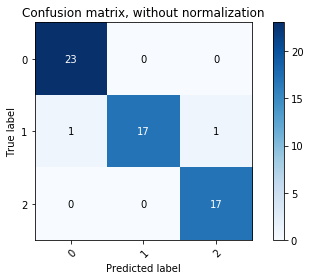

In [39]:
plot_confusion_matrix(y_test,y_test_pred)

In [40]:
get_performance_measures(y_test, y_test_pred)

Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.958 		 1.000 		 0.979
1                         	 1.000 		 0.895 		 0.944
2                         	 0.944 		 1.000 		 0.971


## Testing cross validation

In [41]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split


def train_rf_model(X_train,y_train):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    # rf.fit(X_train, y_train)
    return rf

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)


rf = train_rf_model(X, y)

In [42]:
df = get_cross_validation_df_OLD(rf,X,y)


\begin{tabular}{lll}
\toprule
precision &    recall &  f1-score \\
\midrule
 0.971825 &  0.967937 &  0.967743 \\
\bottomrule
\end{tabular}



## Smote and cross validation

AVERAGE NONE: 
[1. 1. 1.]
AVERAGE NONE: 
[0.85714286 1.         1.        ]
AVERAGE NONE: 
[1.    0.875 1.   ]
AVERAGE NONE: 
[1.         0.85714286 0.83333333]
AVERAGE NONE: 
[1. 1. 1.]
AVERAGE NONE: 
[1. 1. 1.]
AVERAGE NONE: 
[1. 1. 1.]
AVERAGE NONE: 
[1.    0.875 1.   ]
AVERAGE NONE: 
[0.85714286 1.         1.        ]
AVERAGE NONE: 
[1. 1. 1.]
The avg accc is:  0.9663398692810456

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.971825 &  0.967937 &  0.967743 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.96610169 0.03389831 0.        ]
 [0.02816901 0.95774648 0.01408451]
 [0.         0.02083333 0.97916667]]


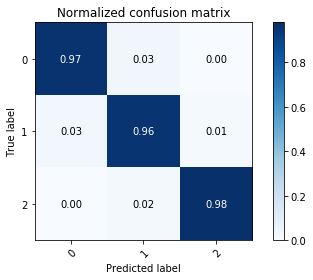

In [43]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

def cross_validate_model(clf, X, y, smote = False):
    
    # For the confusion matrix 
    y_pred_total = []
    y_true_total = []
    
    
    # Metrics
    f1_score_list = []
    recall_list = []
    precision_list = []
    accuracy_list =[]

    n_splits = 10
    skf = StratifiedKFold(n_splits=n_splits)

    # MAKE SURE THE X IS A NUMPY ARRAY
    if isinstance(X, pd.DataFrame):
        X = X.values

    for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
        X_train = X[train_index]
        y_train = y[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X[test_index]
        y_test = y[test_index]  # See comment on ravel and  y_train
        
        if (smote == True):
            sm = SMOTE()
            X_train, y_train = sm.fit_sample(X_train, y_train)
                
        model = clf  # Choose a model here
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        # Adding to total lists
        y_pred_total = y_pred_total + y_pred.tolist()
        y_true_total = y_true_total + y_test.tolist()
        
        # Appending to lists
        label_list = unique_labels(y_pred)
        print("AVERAGE NONE: ")
        print(precision_score(y_test, y_pred, average=None,labels=label_list))
        
        recall_list.append(recall_score(y_test, y_pred, average=None,labels=label_list))
        precision_list.append(precision_score(y_test, y_pred, average=None,labels=label_list))
        f1_score_list.append(f1_score(y_test, y_pred,average=None,labels=label_list))
        accuracy_list.append(model.score(X_test, y_test))
    
    acc_avg = np.average(accuracy_list)
    print("The avg accc is: ", acc_avg)
    
    
    
    rec_avg = np.average(recall_list)
    
    labels = len(label_list)
            
        
    prec_avg = np.average(precision_list)
    f1_avg = np.average(f1_score_list)
    results = {'precision': prec_avg, 'recall': rec_avg, 'f1_avg': f1_avg}
    
    df = pd.DataFrame(columns = results.keys())
    
    i=0
    for name in results.keys():
        df.at[0,name] = np.average(results[name])
        i = i+1
        
    pandas_to_latex.df_to_latex(df)
    
    return df, y_true_total, y_pred_total


df, y_true, y_pred = cross_validate_model(rf,X,y)
plot_confusion_matrix(y_true,y_pred,True)
    